In [1]:
import kagglehub
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
!python --version

Python 3.11.9


In [3]:
# DOWNLOAD DO KAGGLE
# Set kagglehub cache to local datasets folder
os.environ['KAGGLEHUB_CACHE'] = os.path.abspath('')

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Path to dataset files:", path)

Path to dataset files: d:\post-graduate\clusterizacao\notebooks\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2


In [4]:
# Lendo o dataset
df = pd.read_csv(path + '/Country-data.csv')
print(f"Total de países únicos: {df['country'].nunique()}")


Total de países únicos: 167


# Análise exploratória

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.shape

(167, 10)

In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Visualização em Gráficos

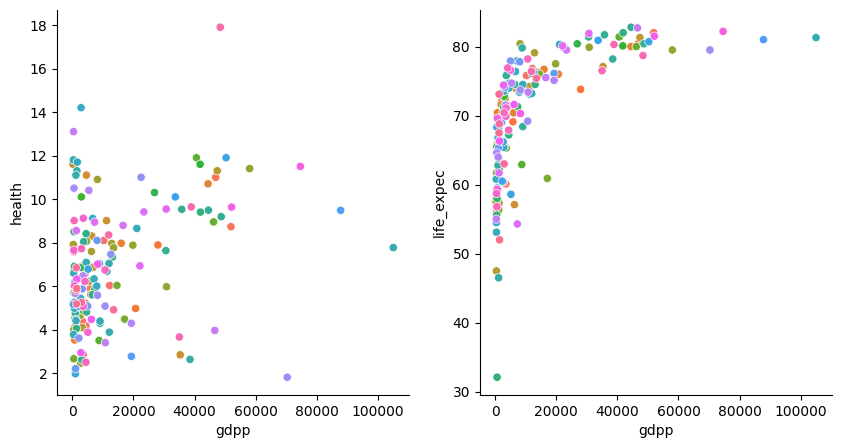

In [10]:
# #----------Seaborn Scatter Plot----------
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(data=df, x='gdpp', y='health', hue='country', ax=ax[0], legend=False)
sns.scatterplot(data=df, x='gdpp', y='life_expec', hue='country', ax=ax[1], legend=False)
sns.despine()
plt.show()

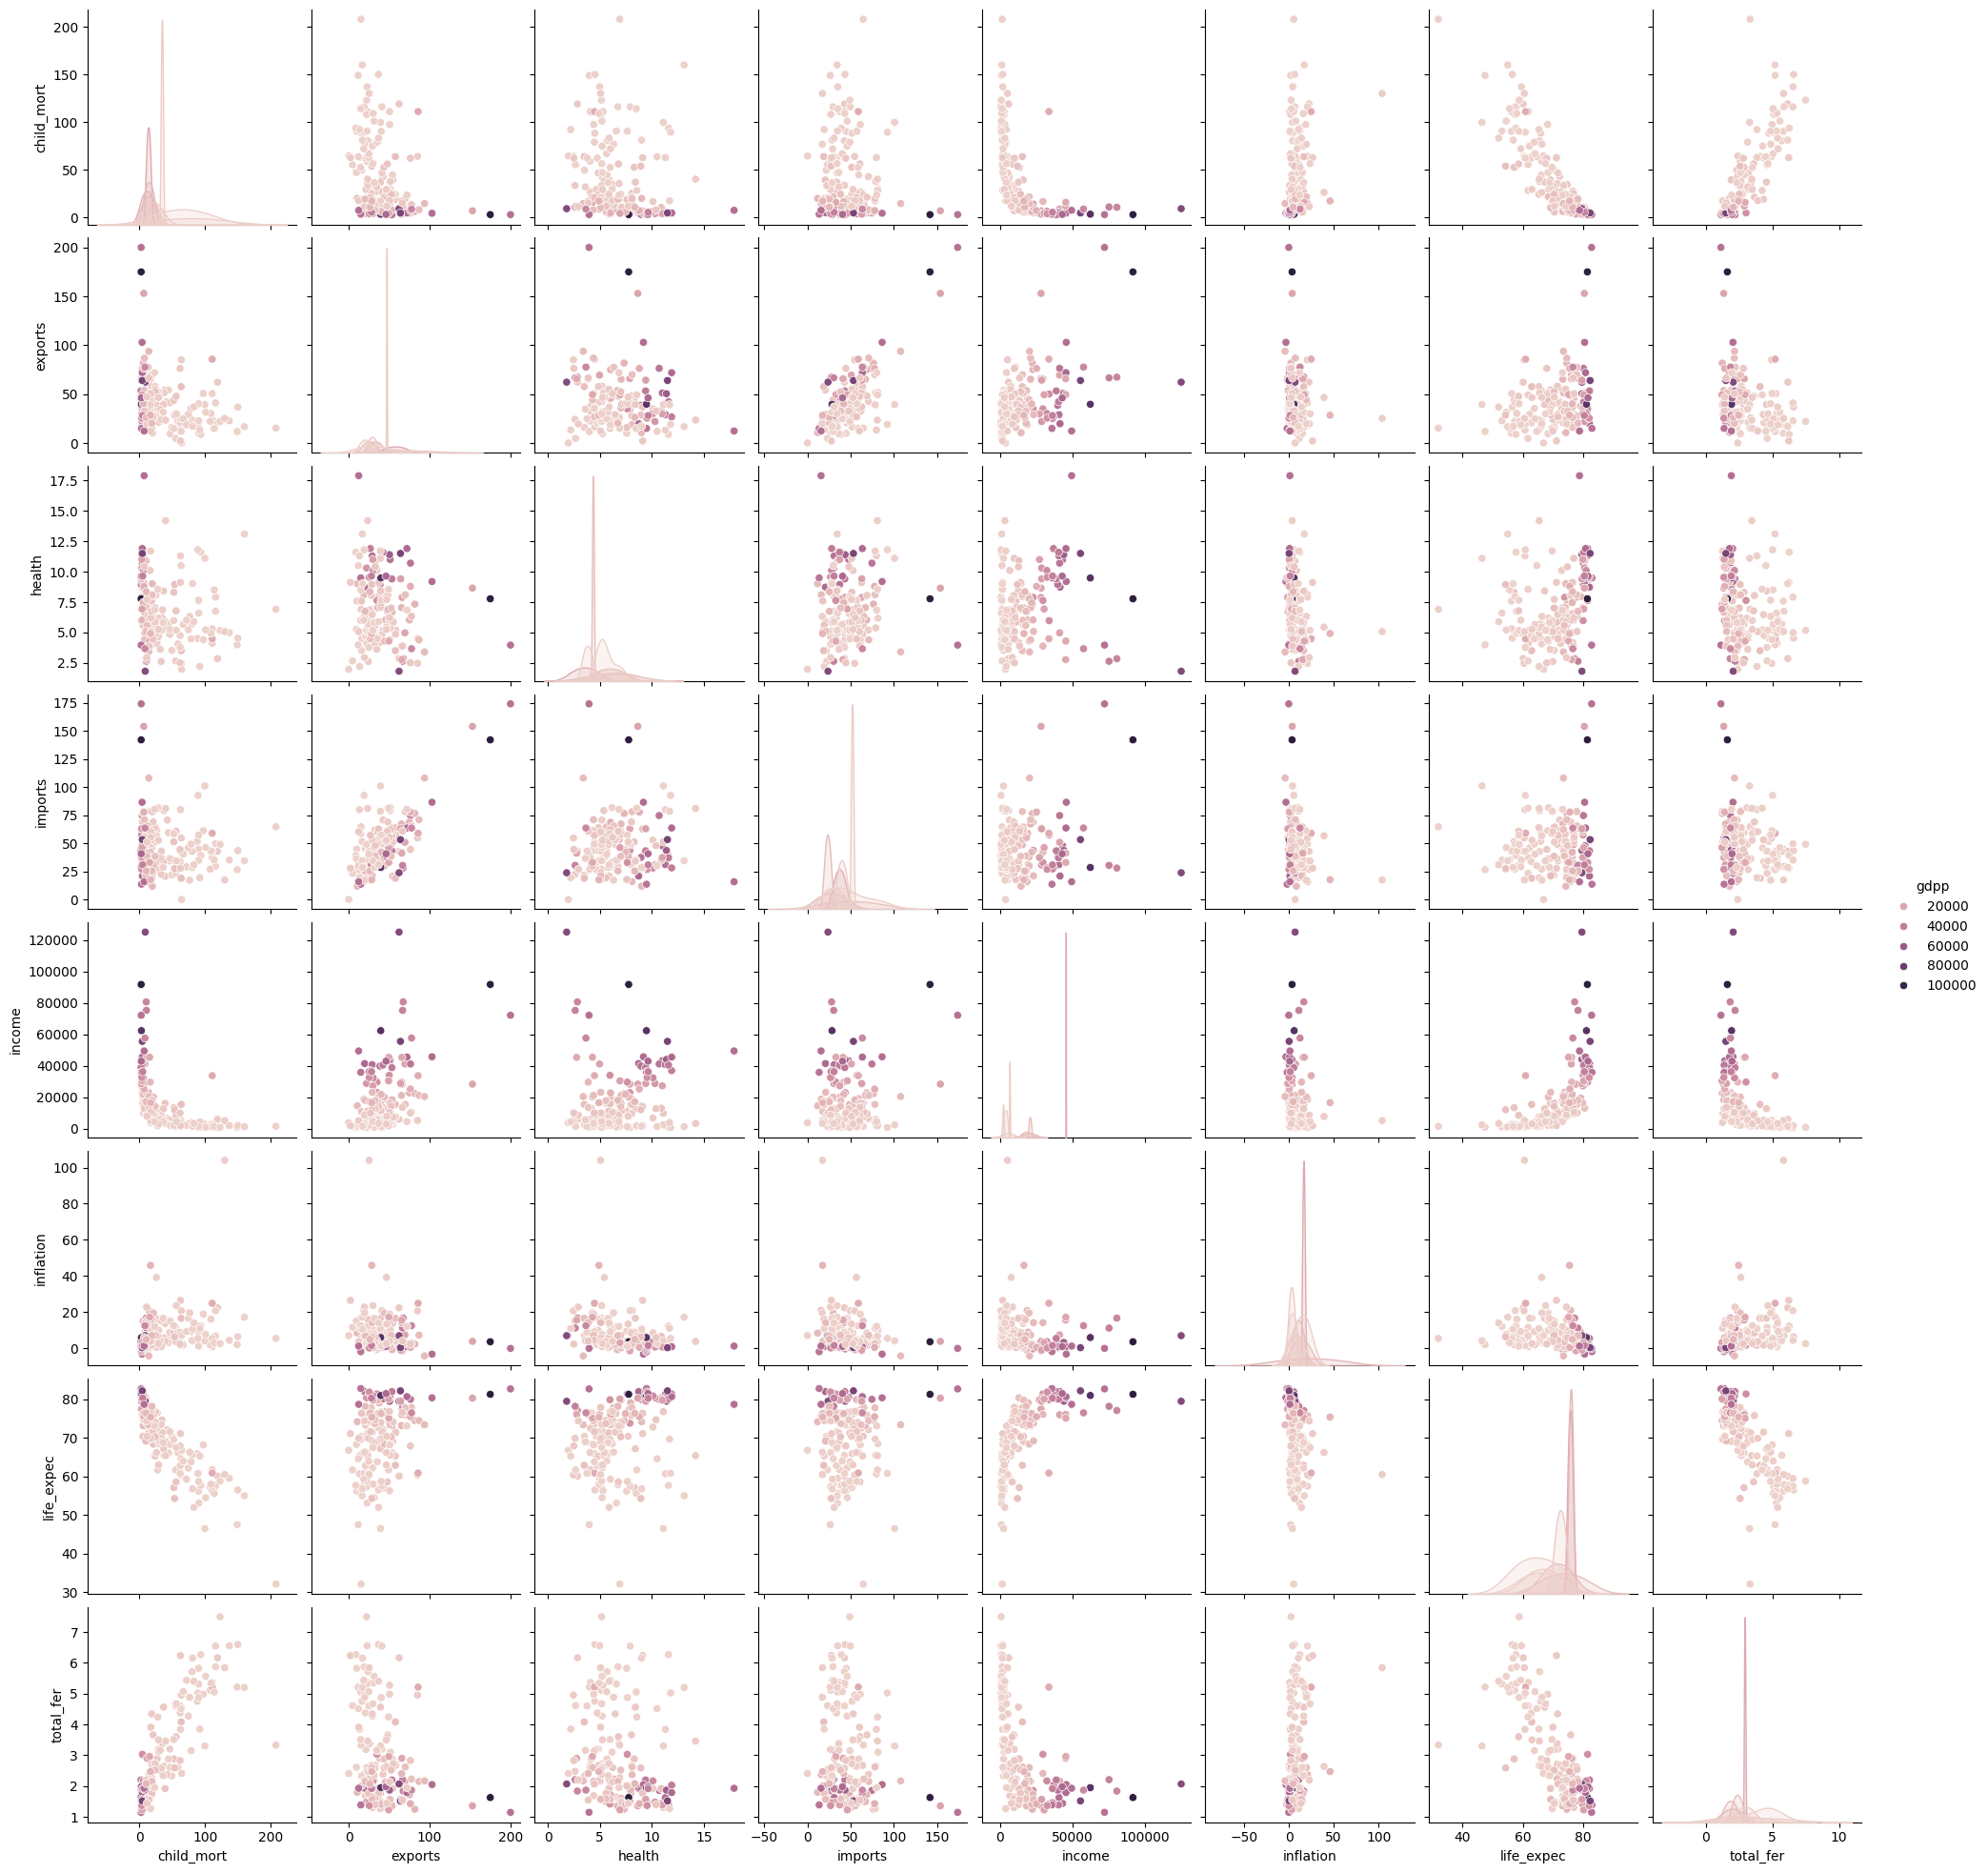

In [11]:
sns.pairplot(data=df.iloc[:, 1:], hue='gdpp')

plt.show()

In [12]:
fig = px.scatter_matrix(df, dimensions=['gdpp', 'health', 'life_expec', 'child_mort'],
                        hover_name='country', color='country')

fig.show()

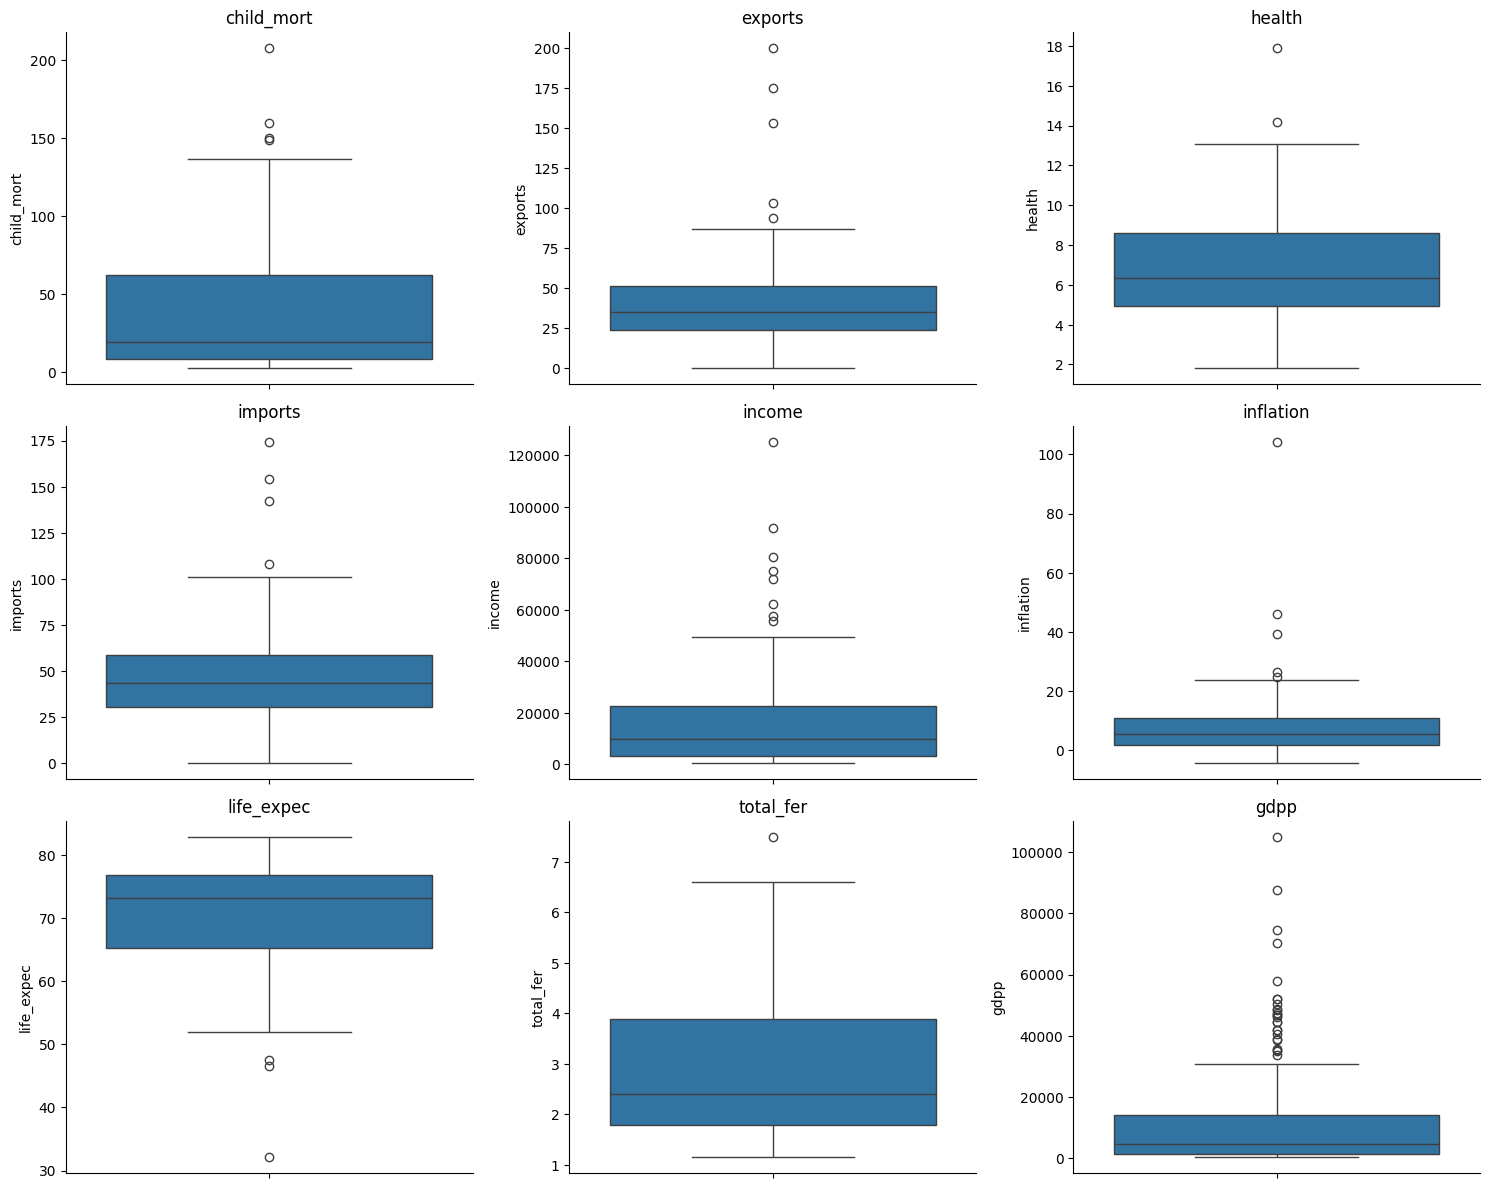

In [13]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = len(numeric_cols)

f, ax = plt.subplots(3, 3, figsize=(15, 12))
ax = ax.flatten()

for i, column in enumerate(numeric_cols):
    sns.boxplot(data=df, y=column, ax=ax[i])
    ax[i].set_title(column)

sns.despine()
plt.tight_layout()
plt.show()

Pela faixa dinâmica e pelas escalas é possível notar discrepância e necessidade de padronização dos dados:

In [14]:
print("\nFaixa dinâmica (max - min):")
print(df[numeric_cols].max() - df[numeric_cols].min())


Faixa dinâmica (max - min):
child_mort       205.4000
exports          199.8910
health            16.0900
imports          173.9341
income        124391.0000
inflation        108.2100
life_expec        50.7000
total_fer          6.3400
gdpp          104769.0000
dtype: float64


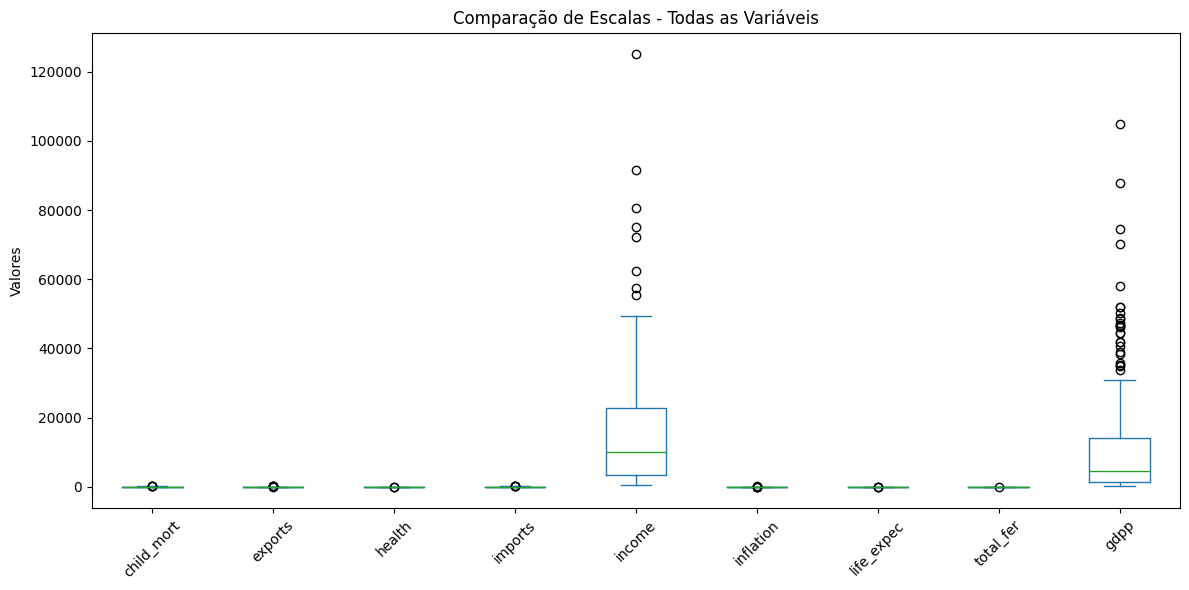

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
df[numeric_cols].plot(kind='box', ax=ax)
plt.xticks(rotation=45)
plt.title('Comparação de Escalas - Todas as Variáveis')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

# Padronização

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_cols])
df_padronized = pd.DataFrame(data_scaled, columns=numeric_cols)

if 'country' in df.columns:
    df_padronized.insert(0, 'country', df['country'])

df_padronized.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


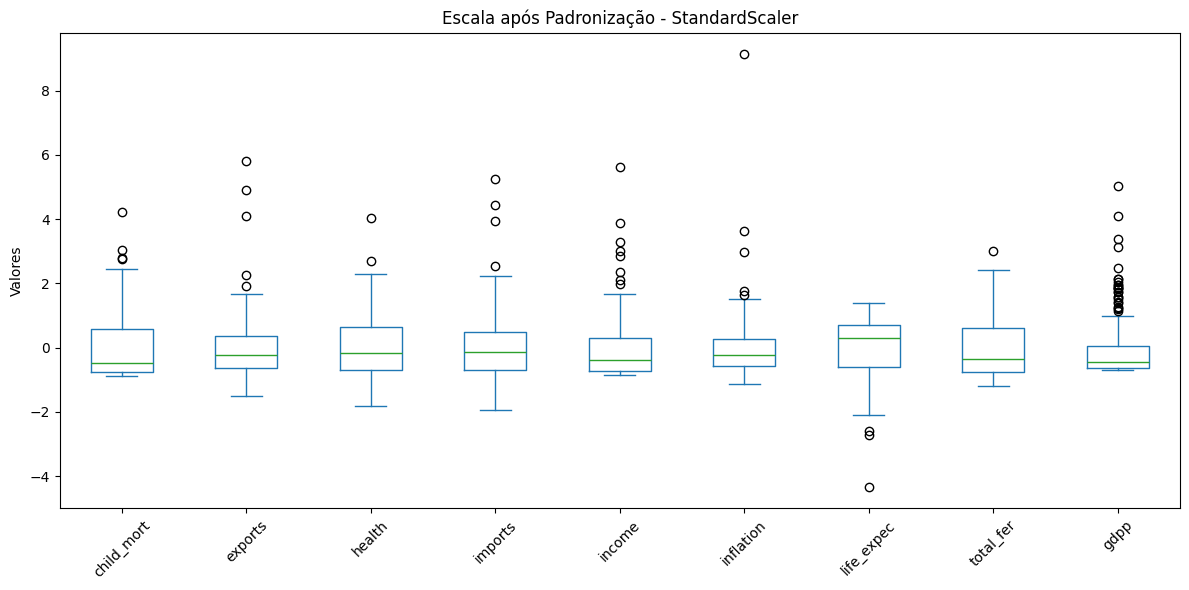

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
df_padronized[numeric_cols].plot(kind='box', ax=ax)
plt.xticks(rotation=45)
plt.title('Escala após Padronização - StandardScaler')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

# K-Médias

### Scikit Learn

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [24]:
df_padronized['cluster_kmeans'] = kmeans.labels_
df_padronized.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0


In [25]:
df_padronized['cluster_kmeans'].value_counts()

cluster_kmeans
0    86
2    45
1    36
Name: count, dtype: int64

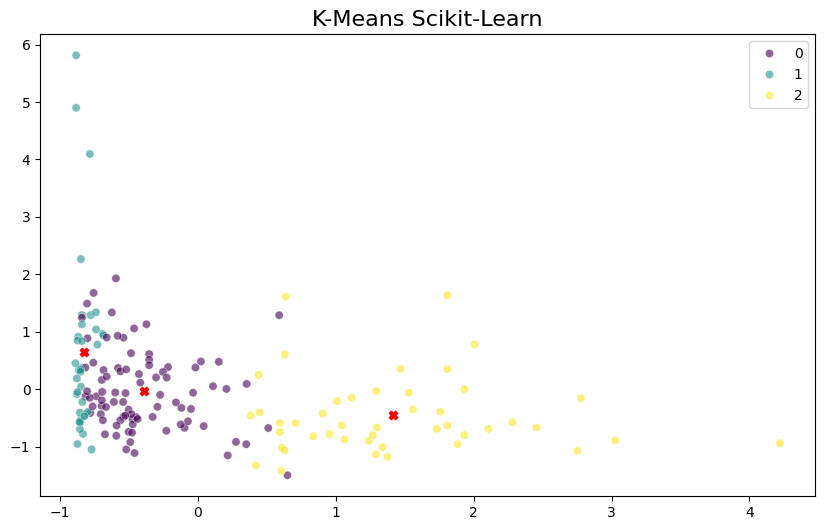

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=kmeans.labels_, palette='viridis', alpha=0.6, ax=ax)
ax.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker='X',
    color='red',
)
ax.set_title('K-Means Scikit-Learn', fontsize=16)

plt.show()

### Representação em Mapa

In [27]:
# Visualizar mapa
fig = px.choropleth(
    df_padronized,
    locations='country',
    locationmode='country names',
    color='cluster_kmeans',
    hover_name='country',
    hover_data={
        'cluster_kmeans': True,
        'income': ':,.0f',
        'gdpp': ':,.0f',
        'child_mort': ':.1f',
        'life_expec': ':.1f',
        'health': ':.1f'
    },
    color_continuous_scale='Viridis',
    title='<b>Clustering de Países - K-Means</b>',
    labels={'cluster_kmeans': 'Cluster'}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='white',
        projection_type='natural earth',
        bgcolor='rgba(0,0,0,0)'
    ),
    width=1000,
    height=600,
    font=dict(size=14),
    title_x=0.5
)

fig.show()

# Análise dos clusters
print("\n" + "="*70)
print("ANÁLISE DOS CLUSTERS - K-Means")
print("="*70)

for i in sorted(df_padronized['cluster_kmeans'].unique()):
    cluster_df = df_padronized[df_padronized['cluster_kmeans'] == i]
    n_countries = len(cluster_df)
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {i} - {n_countries} países ({n_countries/len(df_padronized)*100:.1f}%)")
    print(f"{'='*70}")
    
    if 'country' in df_padronized.columns:
        print(f"\nPaíses:")
        countries = cluster_df['country'].tolist()
        for j in range(0, len(countries), 5):
            print(f"  {', '.join(countries[j:j+5])}")
    
    print(f"\nMédias das variáveis:")
    print(cluster_df[numeric_cols].mean().round(2))

C:\Users\caahs\AppData\Local\Temp\ipykernel_4060\3562669020.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.




ANÁLISE DOS CLUSTERS - K-Means

CLUSTER 0 - 86 países (51.5%)

Países:
  Albania, Algeria, Antigua and Barbuda, Argentina, Armenia
  Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus
  Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana
  Brazil, Bulgaria, Cambodia, Cape Verde, Chile
  China, Colombia, Costa Rica, Croatia, Dominican Republic
  Ecuador, Egypt, El Salvador, Estonia, Fiji
  Georgia, Grenada, Guatemala, Guyana, Hungary
  India, Indonesia, Iran, Iraq, Jamaica
  Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon
  Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives
  Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro
  Morocco, Myanmar, Nepal, Oman, Panama
  Paraguay, Peru, Philippines, Poland, Romania
  Russia, Samoa, Saudi Arabia, Serbia, Seychelles
  Solomon Islands, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan
  Thailand, Tonga, Tunisia, Turkey, Turkmenistan
  Ukraine, Uruguay, Uzbekistan, Vanuatu, Venezuela
  Vietnam

Médias da